In [237]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)
df = pd.read_csv('recommendation.csv', encoding='ISO-8859-1')

# Recommender system for a medical supplies company

bu projede medikal ürünler ile ilgili çalışmalar yapacağız , bizden istenilen sorulara cevap vereceğiz .

<img src='https://media.licdn.com/dms/image/D5612AQEPazd7U9Kf1Q/article-cover_image-shrink_720_1280/0/1681454275602?e=2147483647&v=beta&t=e9q_u8PmwiXaY1uWZap8rM8RaZuIQOOFf4G97AJxmQE'>

# What we do ?  with data 

## ENG: 


Data Prep and Modelling

▪ Missing data

▪ Calculate find the most popular product using maximum sales by volume and dollar amount

▪ Company with a maximum purchase

▪ Build a popularity-based recommender system

▪ Build a recommender system using matrix factorization

▪ Cosine similarity for product description

## TR:

Eksik Veriler

Maksimum satış hacmi ve dolar miktarına göre en popüler ürünü bulun

En yüksek satın almayı yapan şirket

Popülerliğe dayalı bir öneri sistemi oluşturun

Matris faktörizasyonu kullanarak bir öneri sistemi oluşturun

Ürün açıklamaları için kosinüs benzerliği

In [238]:
for i in df.columns:
    print(i)

Customers.id
Customers.fname
Customers.lname
Customers.company
Customers.create_date
Customers.status
Customers.mailing
Customers.reminders
Customers.tax_exempt
Customers.account_id
Customers.sales_rep
Customers.rewards
Customers.profile_id
Customers.last_modified
Customers.customer_type
Orders.id
Orders.customer_id
Orders.fname
Orders.lname
Orders.company
Orders.order_number
Orders.reorder_id
Orders.external_source
Orders.external_id
Orders.currency
Orders.sales_rep
Orders.subtotal
Orders.tax
Orders.shipping
Orders.coupon_id
Orders.coupon_amount
Orders.gift_id
Orders.gift_amount
Orders.fee_name
Orders.fee_amount
Orders.discount_name
Orders.discount_amount
Orders.total
Orders.balance_due
Orders.shipping_carrier
Orders.shipping_method
Orders.shipping_trans
Orders.shipping_flags
Orders.weight
Orders.tracking
Orders.payment_status
Orders.payment_date
Orders.payment_user
Orders.payment_type
Orders.payment_method
Orders.payment_amount
Orders.purchase_order
Orders.payment_id
Orders.payment_c

## EDA

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [240]:
 df.describe(include='all')

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,...,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
count,4194.000000,4194,4194,727,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,4194,4194,728,4194,82.000000,365,5.000000e+00,4194,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,227,278.000000,282,364.000000,4194.000000,351.000000,3577,3751,0.0,0.0,3.000000,3818,4189.000000,4.176000e+03,1380,3810,722,4176.000000,0.0,3764,3446,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,287,...,3728,3.728000e+03,0.0,0.0,3015,4008,0.0,676,0.0,4011,565,1158,9,0.0,4037,2837.0,3985,2890,16,2964,998.000000,996.000000,996.000000,635,1939,2.127000e+03,622,652,1360,1357,3288,2638.000000,0.0,2920.000000,446,2786.000000,122.000000,2,663,2080.000000,0.0,616,616,616,3998.000000,3998.000000,3998.000000,659.000000,998,200,387.000000,313,1443,802,155,0.0,162,3869,3930.000000,0.0
unique,NaN,1631,2557,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1636,2559,427,3565,NaN,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,26,NaN,NaN,NaN,11,14,NaN,NaN,NaN,695,NaN,NaN,5,5,4,NaN,NaN,3135,2848,NaN,NaN,NaN,NaN,NaN,212,...,1521,NaN,NaN,NaN,1008,1214,NaN,62,NaN,1686,40,206,2,NaN,1710,NaN,20,195,14,14,NaN,NaN,NaN,2,9,NaN,167,182,374,203,201,NaN,NaN,NaN,39,NaN,NaN,1,25,NaN,NaN,15,2,3,NaN,NaN,NaN,NaN,6,72,NaN,148,319,73,17,NaN,13,1002,NaN,NaN
top,NaN,John,Ceccotti,Company145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John,Ceccotti,Company145,16186,NaN,Ebay,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fee,NaN,Discount,NaN,NaN,NaN,fedex,11|Ground,NaN,NaN,NaN,7.96468E+14,NaN,NaN,abe,authorize.net,Credit Card,NaN,NaN,0,02708Z,NaN,NaN,NaN,NaN,NaN,For David,...,8000115D-1434302135,NaN,NaN,

In [241]:
# Eksik veri sayısını ve oranını hesapla
eksik = df.isnull().sum()
yuzde = (eksik / len(df)) * 100

# Eksik veri sayısı ve oranını bir arada görüntüle
eksikler = pd.DataFrame({'Missing Values': eksik, 'Percentage': yuzde})

# Eksik verileri en çoktan en aza doğru sıralama
eksikler = eksikler[eksikler['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
eksikler

,Missing Values,Percentage
Products.freight_cost,4194,100.000000
Products.default_quantity,4194,100.000000
Products.audio,4194,100.000000
Orders.gift_message,4194,100.000000
Order_Items.related_id,4194,100.000000
...,...,...
Orders.updated_date,23,0.548402
Orders.payment_date,18,0.429185
Orders.payment_amount,18,0.429185
Orders.payment_status,5,0.119218


In [242]:
### 161 tane boş değere sahip stunlar var 

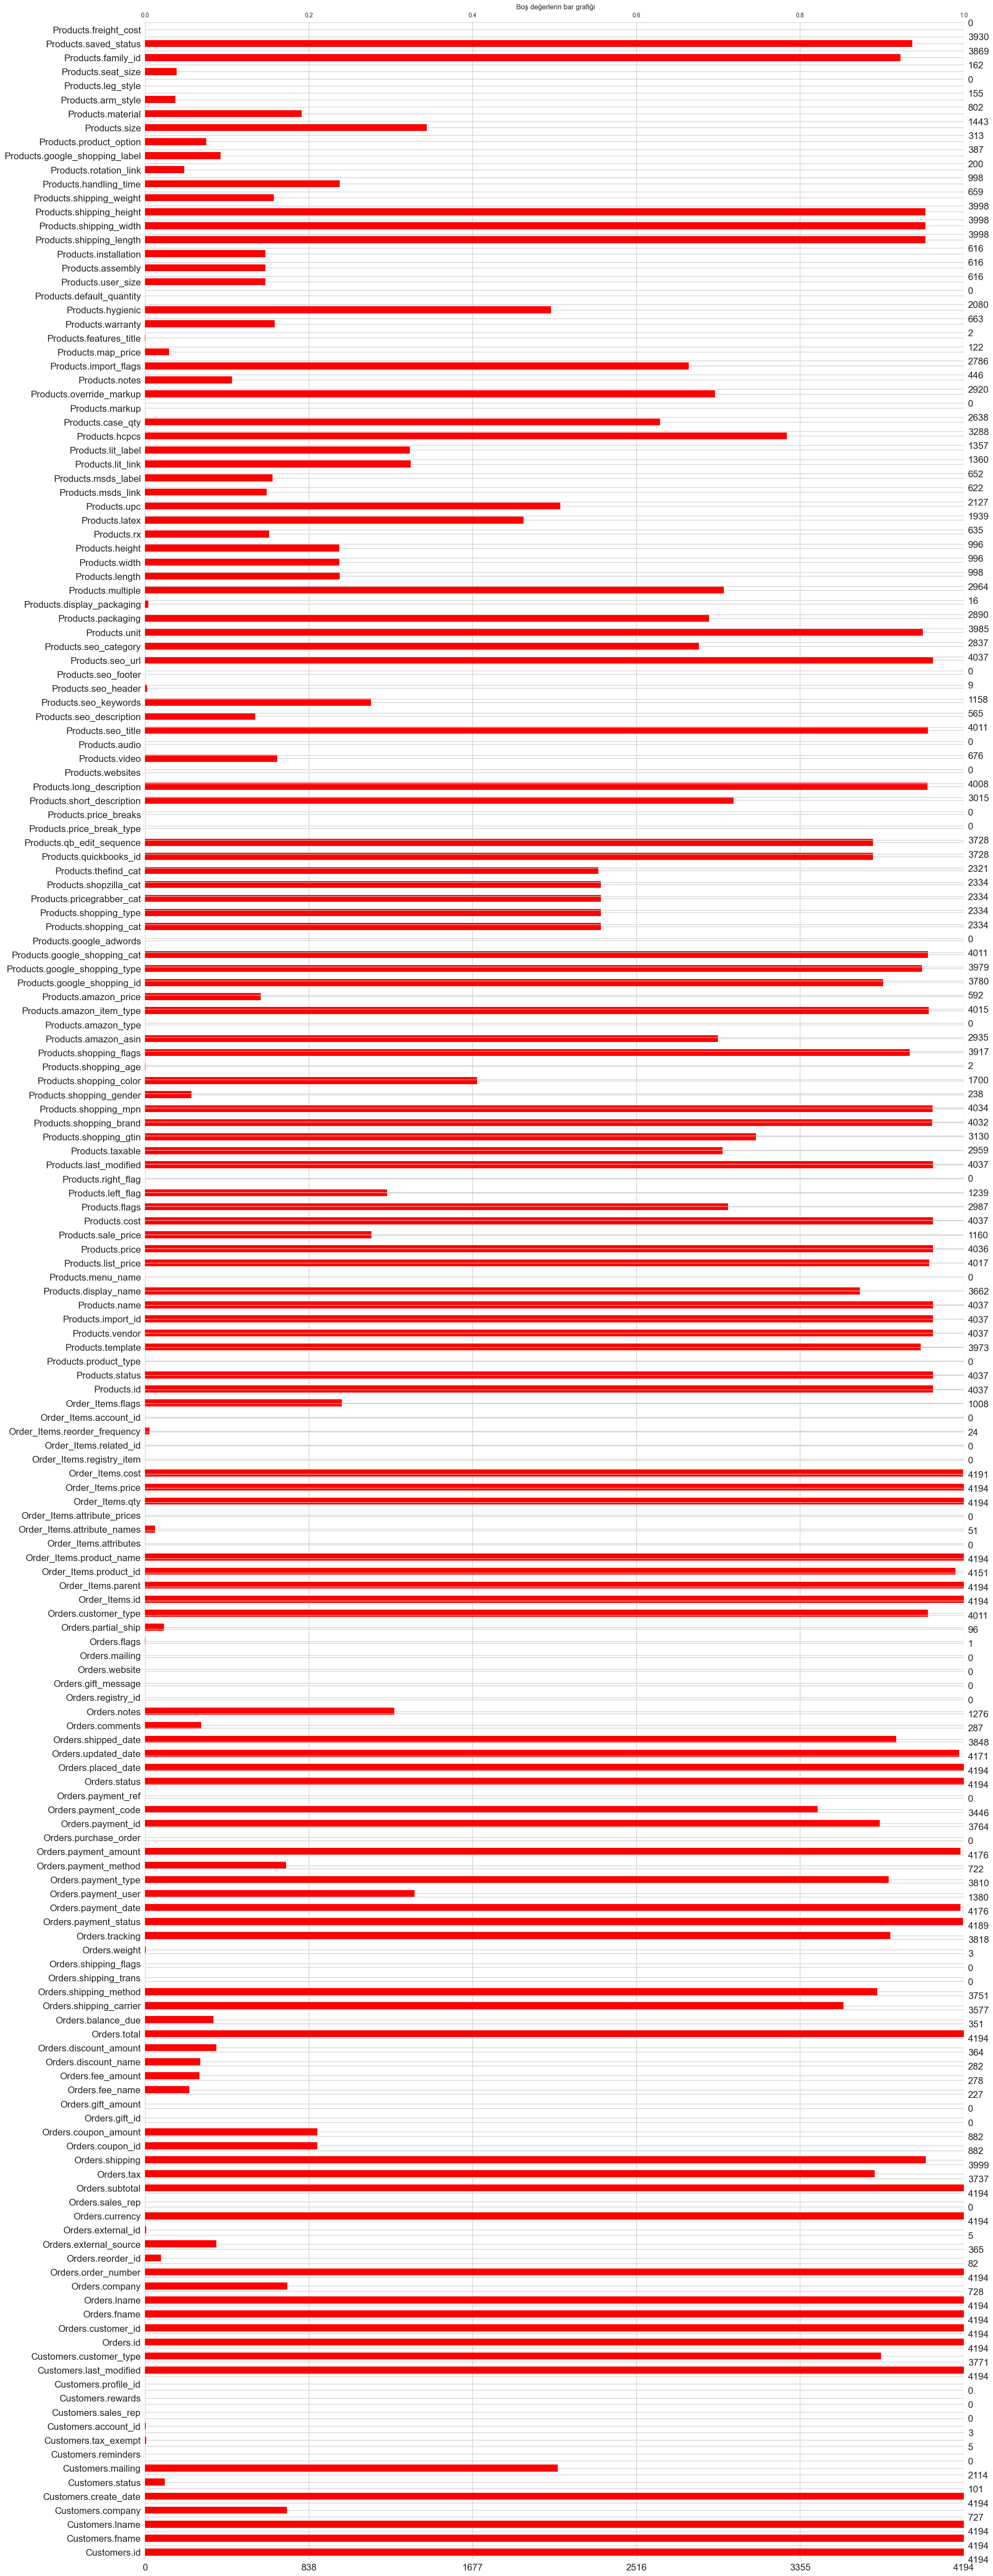

In [243]:
import missingno as msng
plt.title(' Boş değerlerin bar grafiği')
msng.bar(df,color='red');
#msng.matrix(df)  matirx gösterimi


In [ ]:
abs(df.corr()['Products.price'].sort_values(ascending=False))

# Missing Data ile ilgili işlemler 

## Boş değerleri kaldırma 

In [244]:
temiz=df.dropna(axis=1,how="any")

## Önemli stunları geri ekleme 

In [245]:
temiz["Customers.company"]=df["Customers.company"]
temiz["Products.shopping_brand"]=df["Products.shopping_brand"]
temiz["Orders.payment_method"]=df["Orders.payment_method"]
temiz["Orders.shipping_method"]=df["Orders.shipping_method"]
temiz["Full_Name"]=df["Customers.fname"]+" "+df["Customers.lname"]

In [246]:
temiz.head(4)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price,Customers.company,Products.shopping_brand,Orders.payment_method,Orders.shipping_method,Full_Name
0,797,Christy,Dill,1426018724,1437764306,3758,797,Christy,Dill,3758,USD,57.20,64.29,1,1426019099,5284,3758,"Basic Rollators, Green",1,57.20,Company0,MEDLINE,NaN,11|Ground,Christy Dill
1,3,John,Smith,1386089139,1437764354,23,3,John,Smith,23,USD,20.00,29.99,1,1386090455,31,23,"Urinary Drain Bags,0.000",4,5.00,Company1,MEDLINE,NaN,11|Ground,John Smith
2,3,John,Smith,1386089139,1437764354,9531,3,John,Smith,9531,USD,68.78,78.73,3,1449603652,11655,9531,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,Company1,MEDLINE,NaN,0|Standard Shipping,John Smith
3,4,James,Anderson,1386780263,1437762646,29,4,James,Anderson,29,USD,19.56,29.55,1,1386780263,1816,29,Basket for 2-Button Walkers,1,19.56,NaN,MEDLINE,Credit Card,11|Ground,James Anderson


In [247]:
temiz[temiz['Full_Name']=='United promotion promotion']

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price,Customers.company,Products.shopping_brand,Orders.payment_method,Orders.shipping_method,Full_Name
3630,3174,United promotion,promotion,1460397607,1460397607,15457,3174,United promotion,promotion,15457,USD,2164.3,2164.3,8,1460397609,18048,15457,"Phlebotomy Sharps Containers, Red, 1.000 QT",5,133.86,NaN,MEDLINE,NaN,-1|Free Shipping,United promotion promotion
3631,3174,United promotion,promotion,1460397607,1460397607,15457,3174,United promotion,promotion,15457,USD,2164.3,2164.3,8,1460397609,18049,15457,TruTemp,500,2.99,NaN,NaN,NaN,-1|Free Shipping,United promotion promotion


In [248]:
temiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [249]:
df=temiz.copy()

In [295]:
df.head()

,company,create_date,currency,customer_id,customers,fname,full_name,id,last_modified,lname,order_items,order_number,orders,parent,payment_method,placed_date,price,product_name,products,qty,shipping_method,shopping_brand,status,subtotal,total
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


-----------
# Most popular product 

In [250]:
def most_popular(column_name, ranking="total"):
    
    
    # Veriyi belirtilen sütuna göre grupla ve toplama ve ortalama işlemlerini uygula
    grouped=df.groupby(column_name).agg({ "Order_Items.qty":[np.size,np.sum,np.mean],"Order_Items.price":[np.mean]})

    # Toplam tutarı hesapla
    grouped["Total_Amount"]=grouped["Order_Items.qty"]["sum"]*grouped["Order_Items.price"]["mean"]

    # 'ranking' parametresine göre sıralama 

    if ranking=="sum":  # toplam miktara gör
        return grouped.sort_values(("Order_Items.qty","sum"),ascending=False).head(10)
    else:               # toplam tutara göre
        return grouped.sort_values(("Total_Amount"),ascending=False).head(10)
    
    
    
    
    
    #grouped = df.groupby(column_name).agg({"Order_Items.qty": "sum", "Order_Items.price": "mean"})
    
   # grouped["Total_Amount"] = grouped["Order_Items.qty"] * grouped["Order_Items.price"]
    
 #  if ranking == "sum":
 #      # 'Order_Items.qty' sütununa göre sıralama yap (toplam miktara göre)
 #      return grouped.sort_values("Order_Items.qty", ascending=False).head(10)
 #  else:
 #      # 'Total_Amount' sütununa göre sıralama yap (toplam tutara göre)
 #      return grouped.sort_values("Total_Amount", ascending=False).head(10)


## En Çok satan  - Best Sales

In [251]:
# Fonksiyonu çağır ve 'Order_Items.product_name' sütununa göre, toplam miktara göre sıralama yap
most_popular("Order_Items.product_name", "sum")
# Order_Items.qty  göre  en çok satanı bulduk

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   
Corrugated Aerosol Tubing                                       13  110   
Disposable Emergency Blanket, Not Applicable                     4   91   
Silent Knight Pill Crusher Pouches                              48   72   
Protect Extra Protective Underwear, 56.00                       14   69   
Medline Emesis/Barf Bags, throw up bags, Blue -...              47   58   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   
Corrugated Aerosol Tubing                             8.461538   
Disposable Emergency Blanket, Not Applicable         22.750000   
Silent Knight Pill Crusher Pouches                    1.500000   
Protect Extra Protective Underwear, 56.00             4.928571   
Medline Emesis/Barf Bags, throw up bags, Blue -...    1.234043   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   
Corrugated Aerosol Tubing                                  17.573077   
Disposable Emergency Blanket, Not Applicable               34.610000   
Silent Knight Pill Crusher Pouches                         34.156875   
Protect Extra Protective Underwear, 56.00                  25.750000   
Medline Emesis/Barf Bags, throw up bags, Blue -...         15.437234   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000  
Corrugated Aerosol Tubing                            1933.038462  
Disposable Emergency Blanket, Not Applicable         3149.510000  
Silent Knight Pill Crusher Pouches                   2459.295000  
Protect Extra Protective Underwear, 56.00            1776.750000  
Medline Emesis/Barf Bags, throw up bags, Blue -...    895.359574

## Total Amount Ranking by Porduct  
 Toplam Tutar Ürüne Göre Sıralama

In [252]:
most_popular("Order_Items.product_name")
## Total_amount değeri daha önde oldu

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Medline Deluxe Aluminum Transport Chair With Ha...              46   47   
Sanitary Pads with Adhesive & Wings                              2  133   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
K1 Basic Extra-Wide Wheelchairs                                 36   39   
Disposable Emergency Blanket, Not Applicable                     4   91   
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...              15   18   
Baseline&reg; Dynamometer - Smedley Spring - Ad...               1   20   
K4 Extra-Wide Lightweight Wheelchairs                            3   12   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Medline Deluxe Aluminum Transport Chair With Ha...    1.021739   
Sanitary Pads with Adhesive & Wings                  66.500000   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
K1 Basic Extra-Wide Wheelchairs                       1.083333   
Disposable Emergency Blanket, Not Applicable         22.750000   
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...    1.200000   
Baseline&reg; Dynamometer - Smedley Spring - Ad...   20.000000   
K4 Extra-Wide Lightweight Wheelchairs                 4.000000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Medline Deluxe Aluminum Transport Chair With Ha...        126.620870   
Sanitary Pads with Adhesive & Wings                        42.320000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
K1 Basic Extra-Wide Wheelchairs                           118.433889   
Disposable Emergency Blanket, Not Applicable               34.610000   
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...        168.998000   
Baseline&reg; Dynamometer - Smedley Spring - Ad...        150.000000   
K4 Extra-Wide Lightweight Wheelchairs                     245.460000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Medline Deluxe Aluminum Transport Chair With Ha...   5951.180870  
Sanitary Pads with Adhesive & Wings                  5628.560000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
K1 Basic Extra-Wide Wheelchairs                      4618.921667  
Disposable Emergency Blanket, Not Applicable         3149.510000  
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...   3041.964000  
Baseline&reg; Dynamometer - Smedley Spring - Ad...   3000.000000  
K4 Extra-Wide Lightweight Wheelchairs                2945.520000

### The Most Product Purchases Ranking by Company
 Şirketlere Göre En Çok Ürün Satın Alma Sıralaması

In [253]:
most_popular("Customers.company","sum")
# Company59  en çok ürün satan şirket 

Order_Items.qty                 Order_Items.price  \
                             size  sum       mean              mean   
Customers.company                                                     
Company59                      15  381  25.400000         34.610000   
Company343                      2  133  66.500000         42.320000   
Company86                      11  105   9.545455         18.400000   
Company130                     17   71   4.176471         28.382353   
Company171                     12   47   3.916667         31.941667   
Company159                     11   47   4.272727         80.058182   
Company281                      4   43  10.750000         62.910000   
Company89                       6   42   7.000000         31.493333   
Company145                     27   27   1.000000         99.865926   
Company17                       2   27  13.500000        177.190000   

                   Total_Amount  
                                 
Customers.company                
Company59          13186.410000  
Company343          5628.560000  
Company86           1932.000000  
Company130          2015.147059  
Company171          1501.258333  
Company159          3762.734545  
Company281          2705.130000  
Company89           1322.720000  
Company145          2696.380000  
Company17           4784.130000

### Total Amount by Comapany
şriket bazında toplam tutar 

In [254]:
most_popular("Customers.company")


Order_Items.qty                 Order_Items.price  \
                             size  sum       mean              mean   
Customers.company                                                     
Company59                      15  381  25.400000         34.610000   
Company343                      2  133  66.500000         42.320000   
Company17                       2   27  13.500000        177.190000   
Company159                     11   47   4.272727         80.058182   
Company281                      4   43  10.750000         62.910000   
Company145                     27   27   1.000000         99.865926   
Company207                      4   15   3.750000        153.465000   
Company130                     17   71   4.176471         28.382353   
Company86                      11  105   9.545455         18.400000   
Company291                      5    5   1.000000        300.726000   

                   Total_Amount  
                                 
Customers.company                
Company59          13186.410000  
Company343          5628.560000  
Company17           4784.130000  
Company159          3762.734545  
Company281          2705.130000  
Company145          2696.380000  
Company207          2301.975000  
Company130          2015.147059  
Company86           1932.000000  
Company291          1503.630000

### The Most Popular Product
en popular ürün


In [255]:
most_popular("Order_Items.product_name","sum")


Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   
Corrugated Aerosol Tubing                                       13  110   
Disposable Emergency Blanket, Not Applicable                     4   91   
Silent Knight Pill Crusher Pouches                              48   72   
Protect Extra Protective Underwear, 56.00                       14   69   
Medline Emesis/Barf Bags, throw up bags, Blue -...              47   58   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   
Corrugated Aerosol Tubing                             8.461538   
Disposable Emergency Blanket, Not Applicable         22.750000   
Silent Knight Pill Crusher Pouches                    1.500000   
Protect Extra Protective Underwear, 56.00             4.928571   
Medline Emesis/Barf Bags, throw up bags, Blue -...    1.234043   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   
Corrugated Aerosol Tubing                                  17.573077   
Disposable Emergency Blanket, Not Applicable               34.610000   
Silent Knight Pill Crusher Pouches                         34.156875   
Protect Extra Protective Underwear, 56.00                  25.750000   
Medline Emesis/Barf Bags, throw up bags, Blue -...         15.437234   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000  
Corrugated Aerosol Tubing                            1933.038462  
Disposable Emergency Blanket, Not Applicable         3149.510000  
Silent Knight Pill Crusher Pouches                   2459.295000  
Protect Extra Protective Underwear, 56.00            1776.750000  
Medline Emesis/Barf Bags, throw up bags, Blue -...    895.359574

### The highest turnover by product
ürün bazında en yüksek ciro değeri

In [256]:
most_popular("Order_Items.product_name","total")
# 305 tane ürün ortalama 21 tane satıyor ve 34 dolardan 10k 556 tane var 
# 10.370

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Medline Deluxe Aluminum Transport Chair With Ha...              46   47   
Sanitary Pads with Adhesive & Wings                              2  133   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
K1 Basic Extra-Wide Wheelchairs                                 36   39   
Disposable Emergency Blanket, Not Applicable                     4   91   
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...              15   18   
Baseline&reg; Dynamometer - Smedley Spring - Ad...               1   20   
K4 Extra-Wide Lightweight Wheelchairs                            3   12   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Medline Deluxe Aluminum Transport Chair With Ha...    1.021739   
Sanitary Pads with Adhesive & Wings                  66.500000   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
K1 Basic Extra-Wide Wheelchairs                       1.083333   
Disposable Emergency Blanket, Not Applicable         22.750000   
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...    1.200000   
Baseline&reg; Dynamometer - Smedley Spring - Ad...   20.000000   
K4 Extra-Wide Lightweight Wheelchairs                 4.000000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Medline Deluxe Aluminum Transport Chair With Ha...        126.620870   
Sanitary Pads with Adhesive & Wings                        42.320000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
K1 Basic Extra-Wide Wheelchairs                           118.433889   
Disposable Emergency Blanket, Not Applicable               34.610000   
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...        168.998000   
Baseline&reg; Dynamometer - Smedley Spring - Ad...        150.000000   
K4 Extra-Wide Lightweight Wheelchairs                     245.460000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Medline Deluxe Aluminum Transport Chair With Ha...   5951.180870  
Sanitary Pads with Adhesive & Wings                  5628.560000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
K1 Basic Extra-Wide Wheelchairs                      4618.921667  
Disposable Emergency Blanket, Not Applicable         3149.510000  
Medline Excel 2000 Wheelchair, Chrome Frame, Vi...   3041.964000  
Baseline&reg; Dynamometer - Smedley Spring - Ad...   3000.000000  
K4 Extra-Wide Lightweight Wheelchairs                2945.520000

### Top shopping customer
en iyi çalışan 

In [257]:
most_popular("Full_Name","sum")


Order_Items.qty                  Order_Items.price  \
                                      size  sum        mean              mean   
Full_Name                                                                       
United promotion promotion               2  505  252.500000         68.425000   
RoseAnn Reyes                           10  300   30.000000         34.610000   
David Oconnell                           2  220  110.000000         25.270000   
Burten  Leibowitz                        2  133   66.500000         42.320000   
Eleni Ventsanos                         11  105    9.545455         18.400000   
Lisa Clark                               5   81   16.200000         34.610000   
Lynda Samuels                           23   79    3.434783         30.375217   
Lee Ceccotti                            41   74    1.804878         60.687805   
Jana Mane                               16   72    4.500000         55.150000   
Lawrence Chang                          17   71    4.176471         28.382353   

                            Total_Amount  
                                          
Full_Name                                 
United promotion promotion  34554.625000  
RoseAnn Reyes               10383.000000  
David Oconnell               5559.400000  
Burten  Leibowitz            5628.560000  
Eleni Ventsanos              1932.000000  
Lisa Clark                   2803.410000  
Lynda Samuels                2399.642174  
Lee Ceccotti                 4490.897561  
Jana Mane                    3970.800000  
Lawrence Chang               2015.147059

In [258]:
most_popular("Full_Name","total")

Order_Items.qty                  Order_Items.price  \
                                      size  sum        mean              mean   
Full_Name                                                                       
United promotion promotion               2  505  252.500000         68.425000   
RoseAnn Reyes                           10  300   30.000000         34.610000   
Burten  Leibowitz                        2  133   66.500000         42.320000   
David Oconnell                           2  220  110.000000         25.270000   
Lalith Paulus                            2   27   13.500000        177.190000   
Lee Ceccotti                            41   74    1.804878         60.687805   
Jana Mane                               16   72    4.500000         55.150000   
Melissa Burton                          11   47    4.272727         80.058182   
PERRY  BUILDING                          1   20   20.000000        150.000000   
Arlene  Maldonado                        3   13    4.333333        221.250000   

                            Total_Amount  
                                          
Full_Name                                 
United promotion promotion  34554.625000  
RoseAnn Reyes               10383.000000  
Burten  Leibowitz            5628.560000  
David Oconnell               5559.400000  
Lalith Paulus                4784.130000  
Lee Ceccotti                 4490.897561  
Jana Mane                    3970.800000  
Melissa Burton               3762.734545  
PERRY  BUILDING              3000.000000  
Arlene  Maldonado            2876.250000

### Most shopped brand
en çok alışveriş yapılan marka

In [259]:
most_popular("Products.shopping_brand","sum")


Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
CanDo&reg;                               113   182  1.610619   
Fabrication Enterprises Inc.              85   112  1.317647   
WESTMED INC                               14   111  7.928571   
LINKS MEDICAL PRODUCTS                    53    61  1.150943   
Wenzelite                                 36    48  1.333333   
Baseline&reg;                             24    46  1.916667   
OMI INDUSTRIES                             6    36  6.000000   

                             Order_Items.price   Total_Amount  
                                          mean                 
Products.shopping_brand                                        
MEDLINE                              59.674308  294731.405408  
Drive Medical                       120.378224   68254.453178  
HARTMANN-CONCO INC                   58.843525   19065.301967  
CanDo&reg;                           30.438761    5539.854513  
Fabrication Enterprises Inc.         49.979882    5597.746824  
WESTMED INC                          19.477143    2161.962857  
LINKS MEDICAL PRODUCTS               76.459623    4664.036981  
Wenzelite                           179.534722    8617.666667  
Baseline&reg;                       114.330417    5259.199167  
OMI INDUSTRIES                       13.610000     489.960000

### Top paid brand
en çok ödeme yapılan marka

In [260]:
most_popular("Products.shopping_brand","total")

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
Wenzelite                                 36    48  1.333333   
Fabrication Enterprises Inc.              85   112  1.317647   
CanDo&reg;                               113   182  1.610619   
Baseline&reg;                             24    46  1.916667   
LINKS MEDICAL PRODUCTS                    53    61  1.150943   
DEVON MEDICAL PRODUCTS                     7     8  1.142857   
WESTMED INC                               14   111  7.928571   

                             Order_Items.price   Total_Amount  
                                          mean                 
Products.shopping_brand                                        
MEDLINE                              59.674308  294731.405408  
Drive Medical                       120.378224   68254.453178  
HARTMANN-CONCO INC                   58.843525   19065.301967  
Wenzelite                           179.534722    8617.666667  
Fabrication Enterprises Inc.         49.979882    5597.746824  
CanDo&reg;                           30.438761    5539.854513  
Baseline&reg;                       114.330417    5259.199167  
LINKS MEDICAL PRODUCTS               76.459623    4664.036981  
DEVON MEDICAL PRODUCTS              397.140000    3177.120000  
WESTMED INC                          19.477143    2161.962857

### Most Preferred Payment Method
en çok tercih edilen odeme yöntemi

In [262]:
most_popular("Orders.payment_method","total")

Order_Items.qty                Order_Items.price  \
                                 size  sum      mean              mean   
Orders.payment_method                                                    
Credit Card                       373  525  1.407507         86.151340   
PayPal                            318  510  1.603774         49.338113   
Check                              29   66  2.275862         81.778276   
Cash                                2    3  1.500000        115.980000   

                       Total_Amount  
                                     
Orders.payment_method                
Credit Card            45229.453753  
PayPal                 25162.437736  
Check                   5397.366207  
Cash                     347.940000

### Shipping Method and Total Amount
Nakliye Yöntemi ve Toplam Tutar

In [263]:
most_popular("Orders.shipping_method","sum")

Order_Items.qty                   Order_Items.price  \
                                    size   sum        mean              mean   
Orders.shipping_method                                                         
11|Ground                           2474  4446    1.797090         62.332078   
0|Standard Shipping                  902  1188    1.317073         63.942938   
-1|Free Shipping                     267  1085    4.063670        125.706742   
SOUTHWESTERN MOTOR TRNAS               1   200  200.000000         25.270000   
0|Free Shipping                       91    97    1.065934        142.716044   
NATIONAL DELIVERY                      6    54    9.000000         42.331667   
MEDTRANS                               1    30   30.000000         34.610000   
LAND AIR OF NEW ENGLAND                1    10   10.000000        265.330000   
HOWARD'S EXPRESS, INC.                 2     4    2.000000        147.995000   
WILSON TRUCKING CORP                   2     4    2.000000        164.445000   

                           Total_Amount  
                                         
Orders.shipping_method                   
11|Ground                 277128.417041  
0|Standard Shipping        75964.210244  
-1|Free Shipping          136391.814607  
SOUTHWESTERN MOTOR TRNAS    5054.000000  
0|Free Shipping            13843.456264  
NATIONAL DELIVERY           2285.910000  
MEDTRANS                    1038.300000  
LAND AIR OF NEW ENGLAND     2653.300000  
HOWARD'S EXPRESS, INC.       591.980000  
WILSON TRUCKING CORP         657.780000

--------------
# Build a recommender system using matrix factorization
 Matris çarpanlarına ayırma kullanarak bir tavsiye sistemi oluşturma
 
 burada ürünler arasındaki korelasyona bakacağız böylece en alakalı diğer ürünü tavsiye edeceğiz 
 
#### Matrix Factorization veriyi daha anlamlı ve yönetilebilir parçalara ayırır. Özellikle büyük veri setlerinde gizli kalıpları ve ilişkileri keşfetmek için kullanılır. Örneğin, öneri sistemlerinde kullanıcı ve ürünler arasındaki ilişkileri tahmin etmek için kullanıcı-ürün matrislerini faktörize ederiz. Bu, daha iyi öneriler ve analizler yapmamıza yardımcı olur.

In [264]:
matrix=df.pivot_table(index="Orders.customer_id",columns='Order_Items.product_name',values='Order_Items.qty').fillna(0)
matrix.head()

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,12124-3,"18"" Hamper Stands, Standard","19"" Flyweight Lightweight Blue Transport Wheelchair","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels, White, Not Applicable",2000 Extra-Wide Wheelchairs,2000 Wheelchairs,"24 Hour Urine Collection Bottle, 3000.0 ML","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",3 Wheel Flame Blue Rollator Walker with Basket Tray and Pouch,3 Wheel Flame Red Rollator Walker with Basket Tray and Pouch,"3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Blue","3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Red","3"" Wheels For Walkers","3/4"" Guardian Utility Tips, Gray","4-Panel Abdominal Binders, 2X-Large","4-Panel Abdominal Binders, Large/X-Large","5"" Wheels For Walkers","6 Cylinder Oxygen Carrier, M9 Cylinders",6' CPAP Tube,6-spring hand grip (each),6291hda Universal wheels part,"8"" Rear Walker Wheel Attachment","A&D Ointment by H & H Laboratories Inc, 384.00 ML",Accu-Therm Hot/Cold Gel Packs,Accu-Therm Insulated Hot Pack,Accu-Therm Non-Insulated Hot Pack,"Accutouch Chemo Nitrile Exam Gloves, Blue, Medium","Active Liquid Protein Nutritional Supplement, 0.0","Active Liquid Protein Nutritional Supplement, 30.000 OZ",AcuForce&reg; 7.0 Massage Tool,Adaptive Eating Utensils - Adaptive Fork,Addipak Sterile Saline Solution,Adjustable Angle Rotating Suction Cup Grab Bar,Adjustable Height ArmRest AK5ADJARMKIT,Adjustable Height Bathtub Grab Bar Safety Rail,Adjustable Height Home Bed Assist Handle,"Adjustable Height Rollator with 6"" Wheels, Red","Adjustable Height Teak Bath Bench Stool, Rectangular","Adjustable Height Teak Bath Bench Stool, Triangular",Adjustable Height Triangular Teak Bath Bench Stool,"Adjustable Lightweight Folding Cane with Gel Hand Grip, Black","Adjustable Lightweight Folding Cane with Gel Hand Grip, Blue Crackle","Adjustable Lightweight Folding Cane with Gel Hand Grip, Red Crackle",Adult Bariatric Crutches,"AdvanTrode&reg; Elite Electrode, 2"" round, tan tricot, 40/box",Advantage Magnetic Patient Alarms,Advantage Select SE Mattresses,...,Walker Basket Insert,Walker Carry Pouch/Tote,Walker Cup & Cane Holder,Walker Economy Basket with Plastic Tray,"Walker Glide Ski, Gray","Walker Glide Ski, Gray, 1 Pair",Walker Platform Attachment,"Walker Rollator with 6"" Wheels, Fold Up Removable Back Support and Padded Seat, Black","Walker Rollator with 6"" Wheels, Fold Up Removable Back Support and Padded Seat, Blue","Walker Rollator with 6"" Wheels, Fold Up Removable Back Support and Padded Seat, Green","Walker Rollator with 6"" Wheels, Fold Up Removable Back Support and Padded Seat, Red","Walker Rollator with 6"" Wheels, Fold Up Removable Back Support, and Padded Seat","Walker Rollator with Fold Up Removable Back Support and Padded Seat, Blue","Walker Rollator with Fold Up Removable Back Support and Padded Seat, Green","Walker Rollator with Fold Up Removable Back Support and Padded Seat, Red",Walker Ski/Glider,"Walking Crutches with Underarm Pad and Handgrip, Youth","Wall mat hanger, 86"" L x 8"" H x 16"" D, 10 capacity",Wallaby Headrest Extension,"Wallaby Pediatric Folding Wheelchair, 12"" Seat","Wallaby Pediatric Folding Wheelchair, 14"" Seat","Washable Cotton Gait Belts, Black","Washable Cotton Gait Belts, Yellow","Washable Cotton Material Gait Belts, Red, White & Blue Stri

In [273]:
# En popular ürünlerimiz hangileri 
most_popular("Order_Items.product_name","sum")


Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   
Corrugated Aerosol Tubing                                       13  110   
Disposable Emergency Blanket, Not Applicable                     4   91   
Silent Knight Pill Crusher Pouches                              48   72   
Protect Extra Protective Underwear, 56.00                       14   69   
Medline Emesis/Barf Bags, throw up bags, Blue -...              47   58   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   
Corrugated Aerosol Tubing                             8.461538   
Disposable Emergency Blanket, Not Applicable         22.750000   
Silent Knight Pill Crusher Pouches                    1.500000   
Protect Extra Protective Underwear, 56.00             4.928571   
Medline Emesis/Barf Bags, throw up bags, Blue -...    1.234043   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   
Corrugated Aerosol Tubing                                  17.573077   
Disposable Emergency Blanket, Not Applicable               34.610000   
Silent Knight Pill Crusher Pouches                         34.156875   
Protect Extra Protective Underwear, 56.00                  25.750000   
Medline Emesis/Barf Bags, throw up bags, Blue -...         15.437234   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000  
Corrugated Aerosol Tubing                            1933.038462  
Disposable Emergency Blanket, Not Applicable         3149.510000  
Silent Knight Pill Crusher Pouches                   2459.295000  
Protect Extra Protective Underwear, 56.00            1776.750000  
Medline Emesis/Barf Bags, throw up bags, Blue -...    895.359574

In [275]:
urun=matrix["TruTemp"]
urun.head()

Orders.customer_id
3    0.0
4    0.0
5    0.0
7    0.0
8    0.0
Name: TruTemp, dtype: float64

In [276]:
urun.nunique(),urun.unique(),urun.value_counts()

(2,
 array([  0., 500.]),
 TruTemp
 0.0      3053
 500.0       1
 Name: count, dtype: int64)

In [270]:
matrix[["TruTemp","Disposable Emergency Blanket, Gray, Not Applicable"]].corr()

Order_Items.product_name,TruTemp,"Disposable Emergency Blanket, Gray, Not Applicable"
Order_Items.product_name,,
TruTemp,1.000000,-0.000545
"Disposable Emergency Blanket, Gray, Not Applicable",-0.000545,1.000000


In [271]:
matrix[["TruTemp","2-Ply Tissue/Poly Professional Towels, White, Not Applicable"]].corr()


Order_Items.product_name,TruTemp,"2-Ply Tissue/Poly Professional Towels, White, Not Applicable"
Order_Items.product_name,,
TruTemp,1.000000,-0.000328
"2-Ply Tissue/Poly Professional Towels, White, Not Applicable",-0.000328,1.000000


In [278]:
urun_df=pd.DataFrame()


urun_df["product"]=matrix.corrwith(urun).index   # ürün
urun_df["correlasion"]=matrix.corrwith(urun).values # korelasyon
urun_df.sort_values(("correlasion"),ascending=False).head()

,product,correlasion
1675,TruTemp,1.000000
1197,"Phlebotomy Sharps Containers, Red, 1.000 QT",0.707028
249,"CURAD Stretch Vinyl Exam Gloves, Medium",-0.000328
1022,Medline MSC327100 Capri Bladder Control Pads,-0.000328
15,"2-Ply Tissue/Poly Professional Towels, White, ...",-0.000328


# Cosine similarity for product description
<img src='https://pbs.twimg.com/media/GAW4vHUXIAARoRg.png'>
ürün açıklaması için cosinus benzerliği 

kısaca açı küçüldükçe benzerlik artar . 


In [281]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
sparse_matrix=vect.fit_transform(df)

In [283]:
import pandas as pd

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names_out())


In [285]:
df.head()

,company,create_date,currency,customer_id,customers,fname,full_name,id,last_modified,lname,order_items,order_number,orders,parent,payment_method,placed_date,price,product_name,products,qty,shipping_method,shopping_brand,status,subtotal,total
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [286]:
df.shape

(25, 25)

In [288]:
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(cosine_similarity(df,df))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,0.5,1.0,0.5,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
3,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
4,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
5,0.5,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
6,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
7,0.0,0.5,0.0,0.0,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
8,0.0,0.0,0.5,0.0,0.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
9,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0


<Axes: >

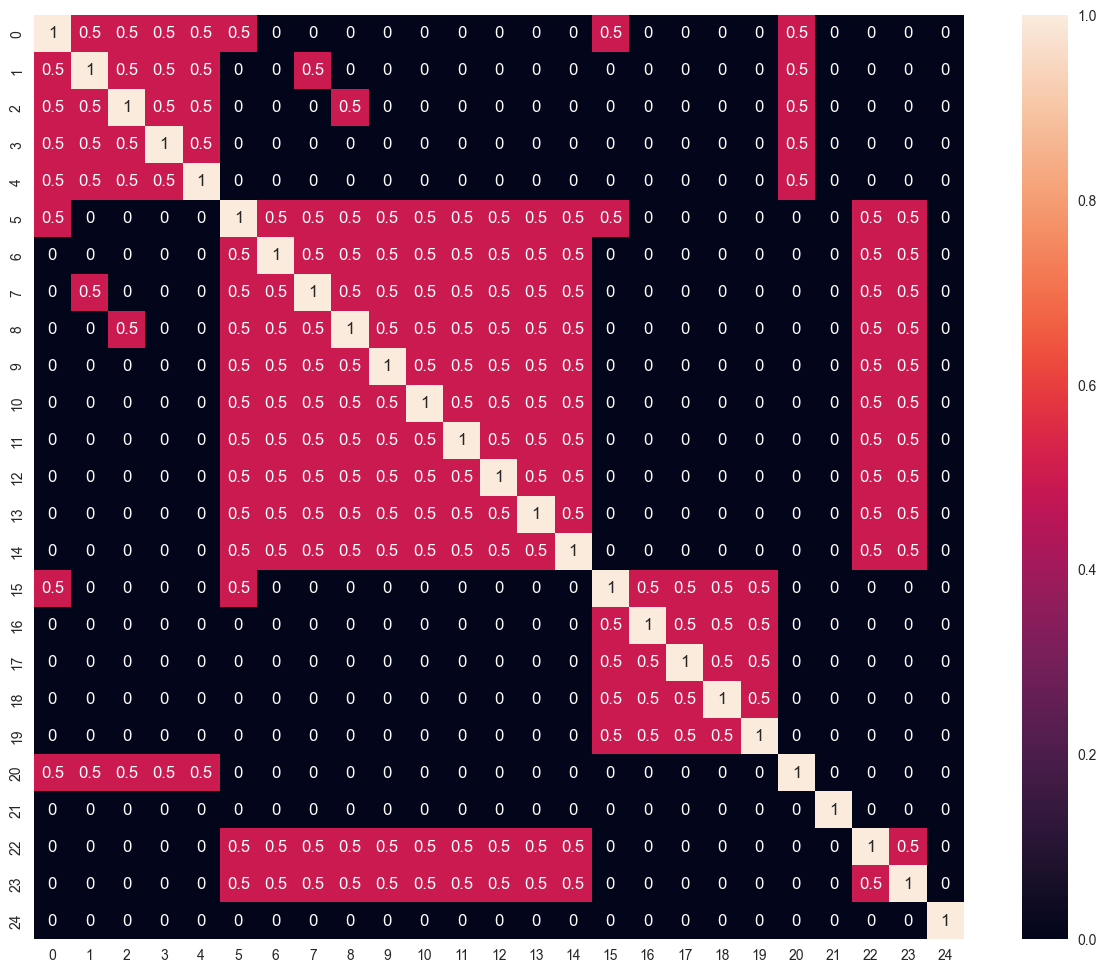

In [293]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(cosine_similarity(df,df),annot=True)

0 ile 1 Arası Değerler: Kosinüs benzerliği değeri 0 ile 1 arasında değişir. Bu değerler aşağıdaki anlamlara gelir:

1: İki veri noktası arasında tam benzerlik olduğunu gösterir. Yani, vektörler tam olarak aynı yöndedir.

0: İki veri noktası arasında hiç benzerlik olmadığını gösterir. Yani, vektörler birbirine dik veya uzak yöndedir.

----
Benzerlik Ölçüsü: Kosinüs benzerliği, iki vektör arasındaki açıyı ölçer. Açının büyüklüğü, vektörler arasındaki benzerliği yansıtır:

Küçük Açılar (Yüksek Benzerlik): Küçük bir açı, yüksek benzerlik anlamına gelir.

Büyük Açılar (Düşük Benzerlik): Büyük bir açı, düşük benzerlik anlamına gelir.

----

Özellikle Kullanımı:

Metin Madenciliği: Kelime gömme vektörleri arasındaki benzerlikleri belirlemek için.

Öneri Sistemleri: Kullanıcılar veya ürünler arasındaki benzerlikleri hesaplamak için.

Kümeleme: Veri noktalarının birbirine yakınlığını ve kümelere aitliğini değerlendirmek için.

 #  Verilen Soruları çüzdül

## Kücük bir clusterinng

In [83]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [84]:
x=pd.get_dummies(df,drop_first=True)

In [85]:
wcss=[]
ss=[]
for i in range(2,15):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    
    print(i,'. için :',ss1)  
    wcss.append(model.inertia_)


2 . için : 0.9688932106997509
3 . için : 0.8889447803376391
4 . için : 0.8207790467102378
5 . için : 0.5948856998584278
6 . için : 0.5642973959561921
7 . için : 0.7706168763872291
8 . için : 0.8310131215838646
9 . için : 0.8340074571262267
10 . için : 0.8038428350830464
11 . için : 0.8368492404901671
12 . için : 0.7743729098154826
13 . için : 0.8099237390586224
14 . için : 0.8541460707943912


In [86]:
from yellowbrick.cluster import  KElbowVisualizer 

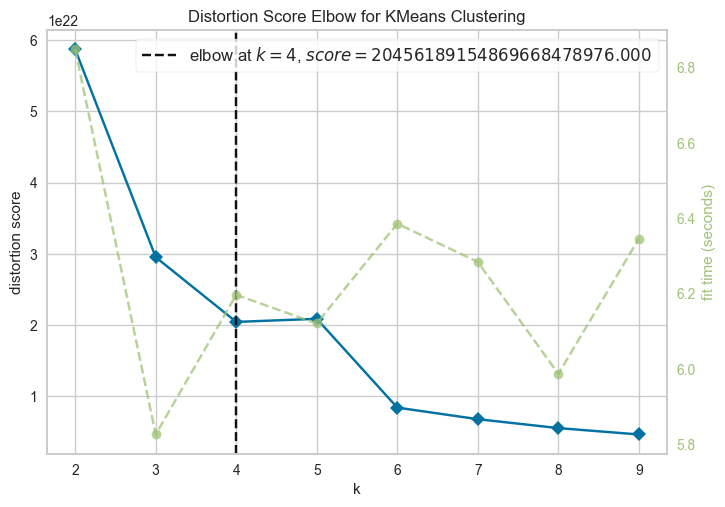

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

# k değeri 4 yani  4 gurapa ayıracağız ayıracğız 

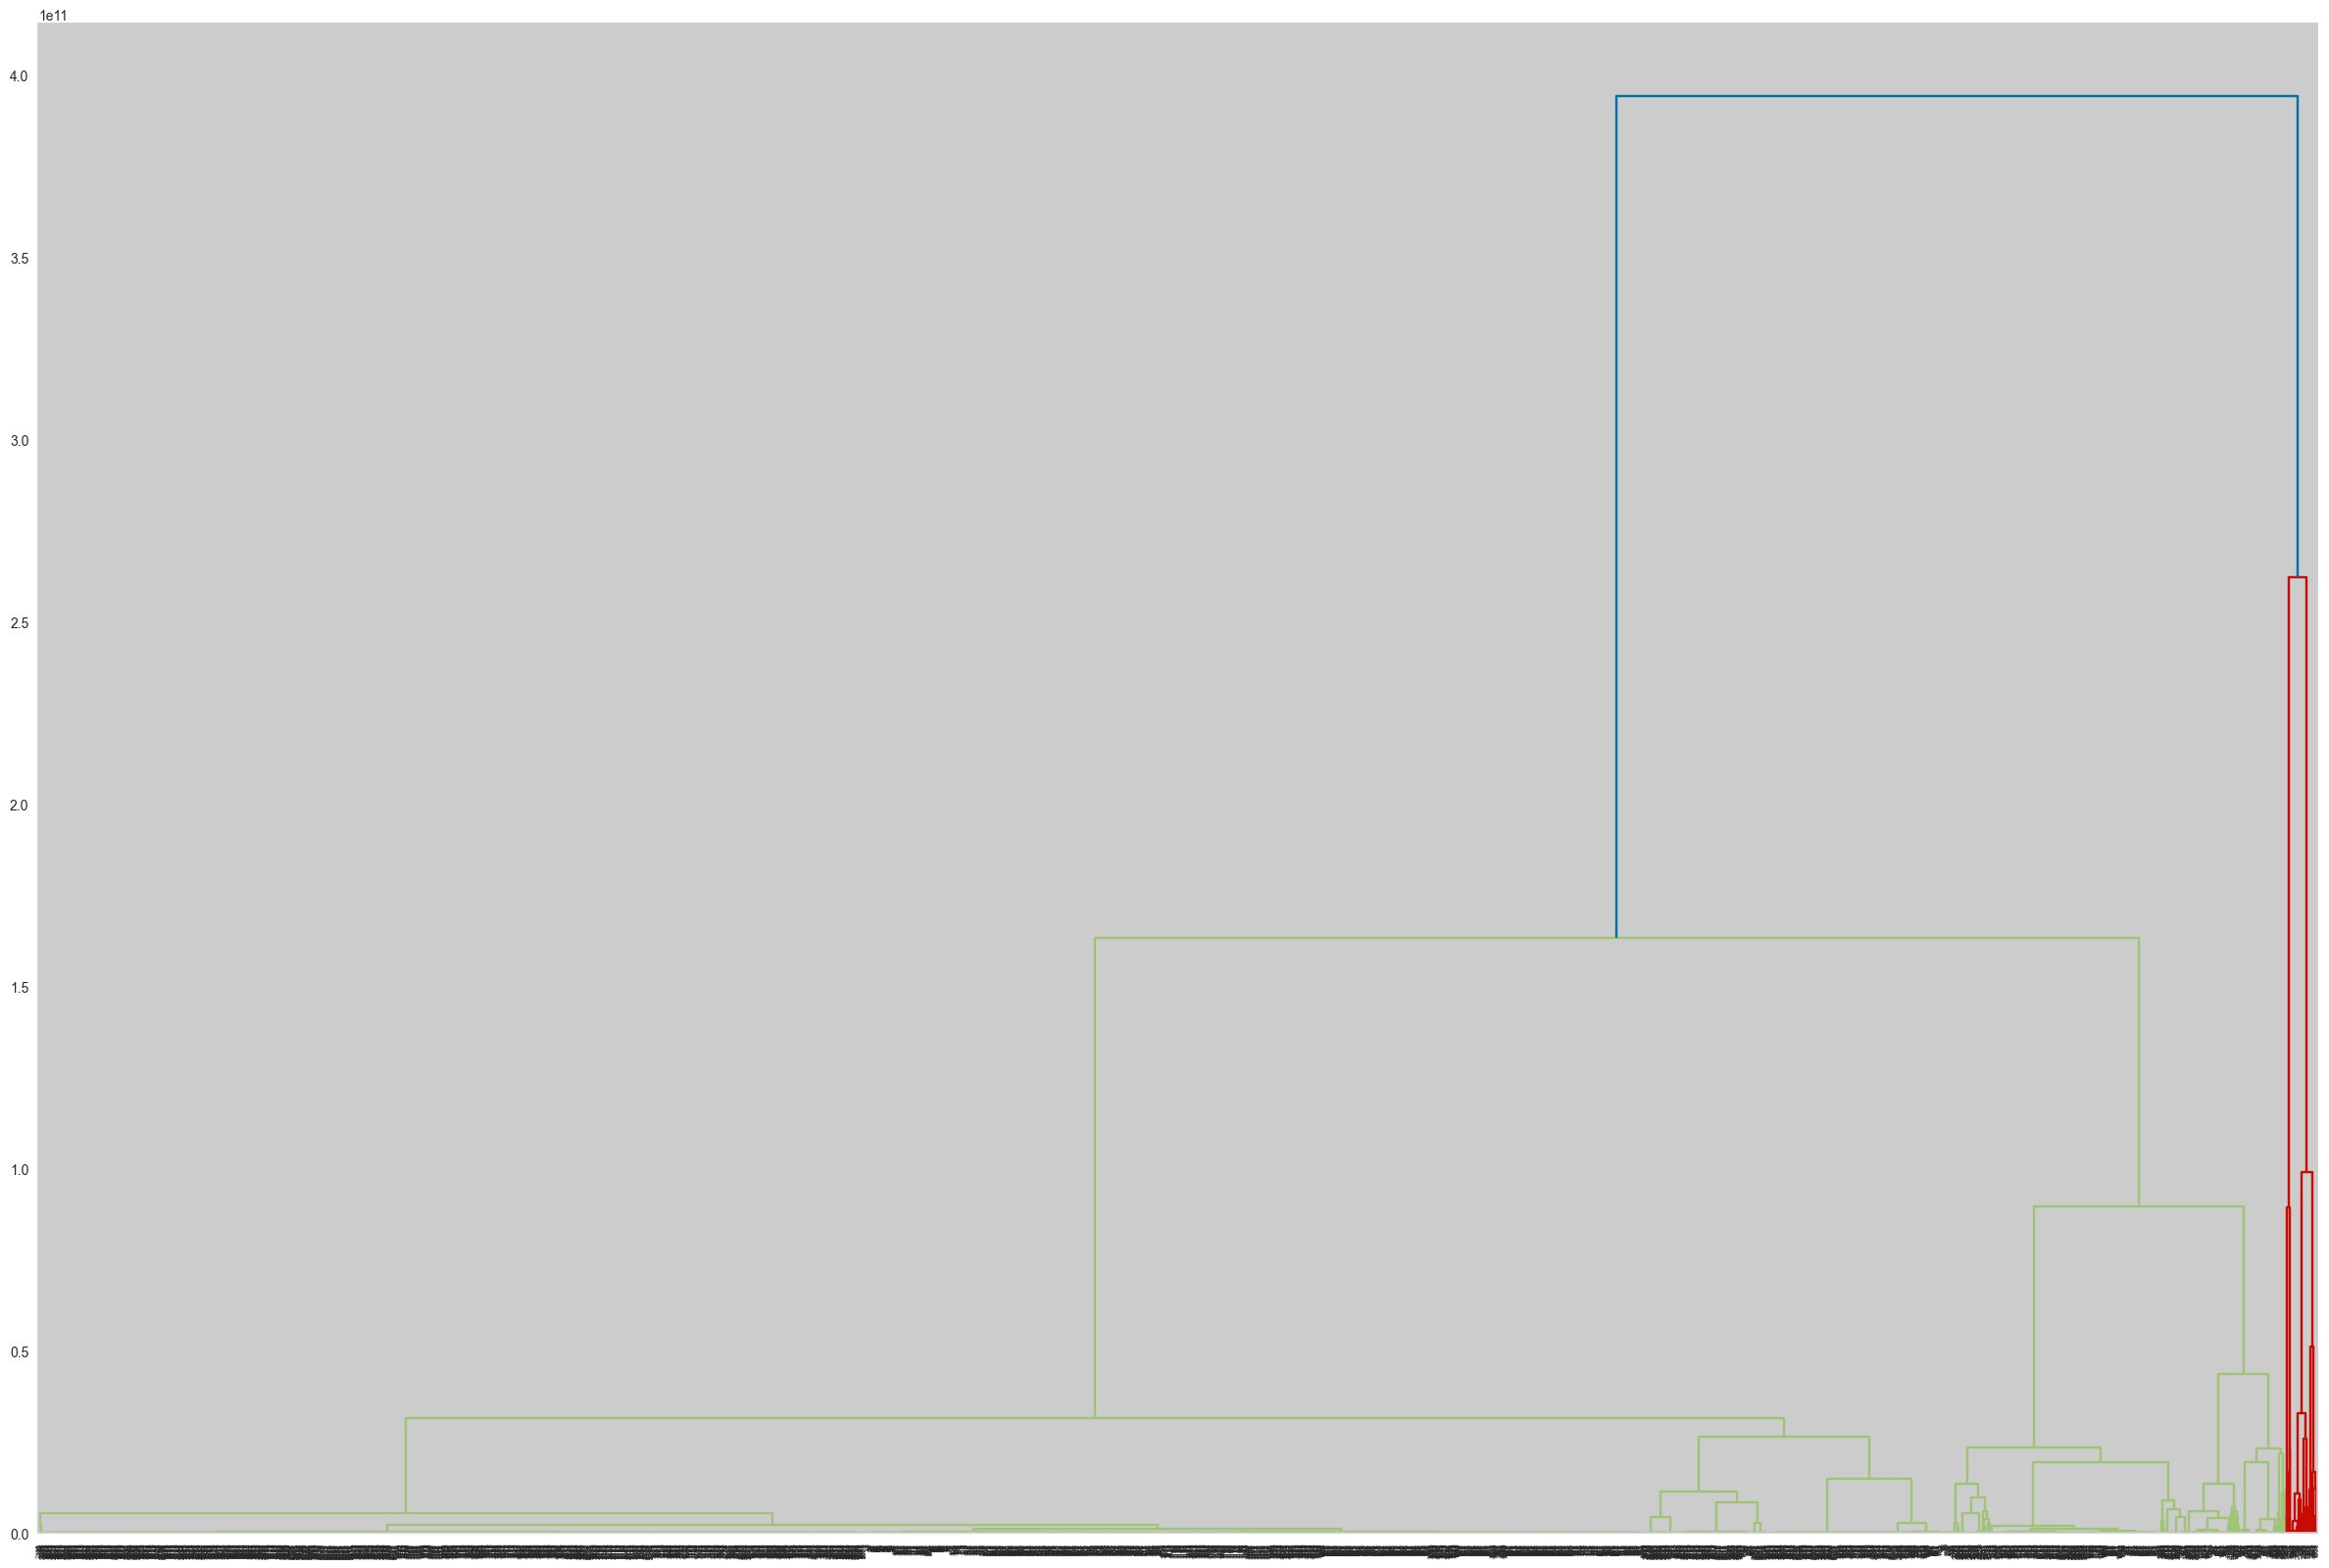

In [88]:
from scipy.cluster.hierarchy import dendrogram,linkage
data=linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(30,20))
dendrogram(data);

In [89]:
model=KMeans(n_clusters=4)
predict=model.fit_predict(x)

In [90]:
deger=pd.DataFrame()
deger["Customers.id"]=df["Customers.id"]
deger["Customer"]=df["Customers.fname"]+" "+df["Customers.lname"]
deger["Cluster"]=predict

In [66]:
deger.head()

,Customers.id,Customer,Cluster
0,3,JohnJohn SmithSmith,0
1,4,James Anderson,0
2,5,AbrahamAbrahamAbraham PollakPollakPollak,2
3,7,peggy thompson,0
4,8,Randy Pruss,0


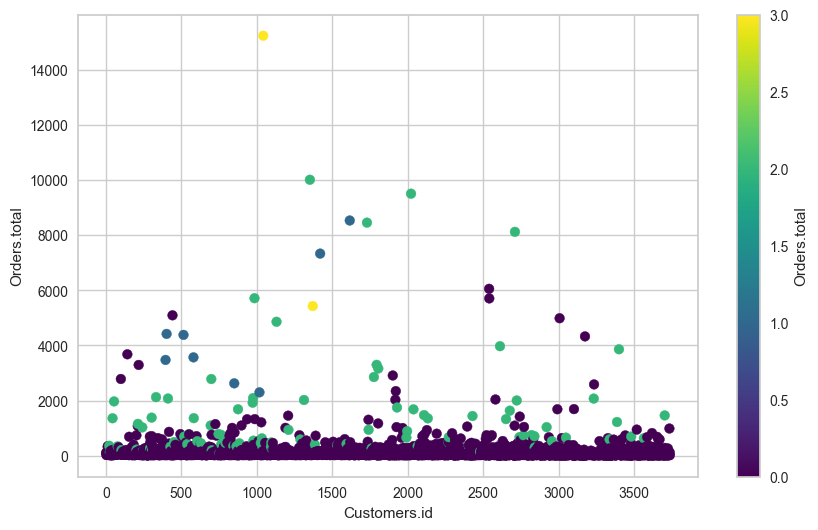

In [95]:
import matplotlib.pyplot as plt

# Örnek veri çerçevesini oluşturun
# x = df_dummies -> Burada df_dummies, önceden işlem yapılmış bir DataFrame olmalıdır

plt.figure(figsize=(10, 6))
plt.scatter(x=x["Customers.id"], y=x["Orders.total"], c=predict, cmap='viridis')
plt.colorbar(label='Orders.total')
plt.xlabel('Customers.id')
plt.ylabel('Orders.total')
plt.show()
